# NLP based Text Clustering

## Problem Definition

1. Our Data has two primary lists
2. Labels : Various titles from different religious books 
3. Content : religious text matched to their titles. 
4. Analyze the text data by clustering the documents into groups


## Objective

Our dataset is a consolidated study of finding the optimum number of clusters with different methods.


## Procedure

1. In the Jupyter/Spyder IDE import the necessary libraries. 
2. Load the files labels and data in two data frames. 

3. Check if the number of titles matches the content.

4. Clean the data for html tags, special characters and punctuations.

5. Include a stopword list.

6. Clean data with stemming/lemmitization.

7. Create seperate functions for cleaning for reusability:

8. tokenize the text with the cleaned data.

9. remove the stopwords from the text.

10. Convert the raw data using Vectorizer

11. Further reduce the data matrix with PCA

12. Declare  the number of clusters.

13. Perform KMeans Clustering.

14. Perform the Mahanalobis function.

15. Perform DeD with the input of Mahanalobis function

16. Plot the DED graph

17. Visualise the data with Word Cloud.

18. Conclude with the inferences.


## Pseudocode

1. Open the Spder/Jupyter notebood.
2. Set the virtual directory.
3. Open a new python file.
4. import the necessary libraries lile NLTK, PANDAS, NUMPY, SCIKIT-LEANR, SCIPY and MATPLOTLIB.
5. Load the two datasets in seperate lists having labels and the contents.
6. Cross verify if the number of titles matches the amount of content.
7. Clean the data for HTML tags, special characters and punctuations using Regular Expression.
8. Include the english stop words in a variable
9. Include the Lemmatizer object and check the content list for stopwords and lemmatize
10. Use NLTP tokenizer and assign tokens for each word.
11. Create a loop and execute it for the entire document.
12. Convert the raw data into Vectors using CountVectorizer.
13. Further shrink the data with PCA.
14. MAhanalobis function taking mean/ each point in the matrix. 
15. USe the Output of the Mahanalobis function and add it to the DED algorithm
16. Find the optimal clusters from the DED as per the procedure given in the reference document.
18. Plot the DED graph awith k clusters as x label and DED values in the y axis.
19. Cluster the data using the optimal clusters retrieved in the DED with K-Means.
20. Plot the elbow graph.
21. Conclude it with the observations and the inferences

### Importing the necessary libraries

In [25]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  9 21:54:02 2021

@author: Shalini
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer 
lemmmatizer = WordNetLemmatizer()
tokenizer = WordPunctTokenizer()
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Loading the Dataset

In [2]:
df_ReligiousTxt = pd.read_csv('Complete_data.txt', sep='delimiter',header=None,  encoding= 'unicode_escape', engine='python')

In [3]:
df_ReligiousTxt.shape

(1180, 1)

### Tokenisation and Lemmatization

In [4]:
stop = stopwords.words('english')

In [5]:
def TextProcess_html(sentence):
    processTxt = re.compile('<.*?>')
    processTxt = re.sub(processTxt, ' ', sentence)
    return processTxt
def TextProcess_Punct(word):
    processWord = re.sub(r'[?|!|\'":|#]', r' ', word)
    processWord = re.sub(r'[.|,|)|(|\|/]', r' ', processWord)
    return processWord

In [6]:
final_string = []
Lem_string = ''
words = ''

In [7]:
for word in df_ReligiousTxt[0]:
    filtered_sentence = []
    word1 = TextProcess_html(word) 
    
    for cleaned_word in TextProcess_Punct(word).split():        
        if (cleaned_word.lower().isalpha() and cleaned_word.lower() not in stop):
           Lem_string = (lemmmatizer.lemmatize(cleaned_word.lower())).encode('utf8')
           filtered_sentence.append(Lem_string)
            
        else:
            continue
        
    str_append_filtSent = b' '.join(filtered_sentence)
    final_string.append(str_append_filtSent)
    final_string = list(filter(None,final_string))
        
len(final_string)  

589

### Vectorization

Transforming the text into vectors using BagOfWords

In [8]:
vectorizer = CountVectorizer(lowercase=False)
vector = vectorizer.fit_transform(final_string)
vector_arr = vector.toarray()
vector_vocab = vectorizer.vocabulary_
vector_names = vectorizer.get_feature_names()
count_list = vector.toarray().sum(axis=0)   

print(vector.shape)

(589, 7089)


### Dimensionality Reduction with PCA

In [9]:
#Applied explained variance as 84 to reduce the size of the matrix
pca = PCA(.84)
Result = pca.fit_transform(vector_arr) 
print(Result.shape)

(589, 124)


### Mahalanobis Depth Function

In [10]:
mahalanobis = []

def Mahalanobis(star=None,endd=None):
    if star == None:
        x_minus_mu = np.array(Result) - np.mean(Result)         
    else:        
        cluster = np.array(Result[math.ceil(star):math.ceil(endd)])
        x_minus_mu = cluster - np.mean(cluster) 
    cov = np.cov(np.transpose(Result))
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahalanobis = 1/(1+np.dot(left_term, np.transpose(x_minus_mu)))
    return mahalanobis

In [11]:
Di_k = Mahalanobis() 
DM_max = np.argmax(np.median(Di_k,axis=0))
Delta_k = np.mean(Di_k - DM_max)
DW_k = []
DB_k = []
num = len(Result)     
Delta_Di_DM = []
Di_k_max = []
DeD = []

### Estimating the number of clusters - DeD Algorithm

In [12]:
DeD = []  
for k in range(2,20):
    Ded_Range = num / k    
    start = 0
    end = 0      
    for j in range(1,k): 
        start = end + 1 
        end = start + Ded_Range - 1
        Di_k_max = Mahalanobis(start,end)       
        DM_Loop_max = np.argmax(np.median(Di_k_max,axis=0))        
        Delta_Di_DM = np.mean(Di_k_max - DM_Loop_max)    
          
    DW_k = np.mean(Delta_Di_DM)      
    DB_k = Delta_k - DW_k      
    DeD.append(abs(DW_k - DB_k))
    
k = np.argmax(DeD)
print(k)

8


With an explained variance of 84 , the optimal clusters retrieved are 8.

### Visualization

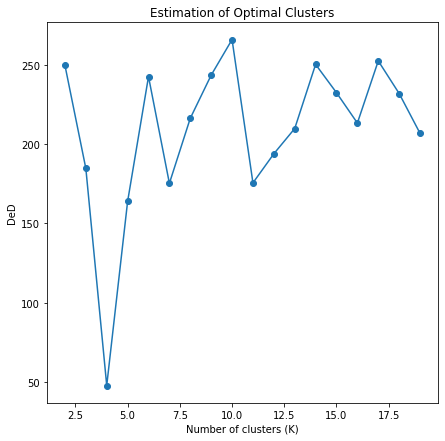

In [13]:
plt.figure(figsize = (7,7))
plt.plot(range(2,20),DeD,marker='o')
plt.title('Estimation of Optimal Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('DeD')
plt.show()

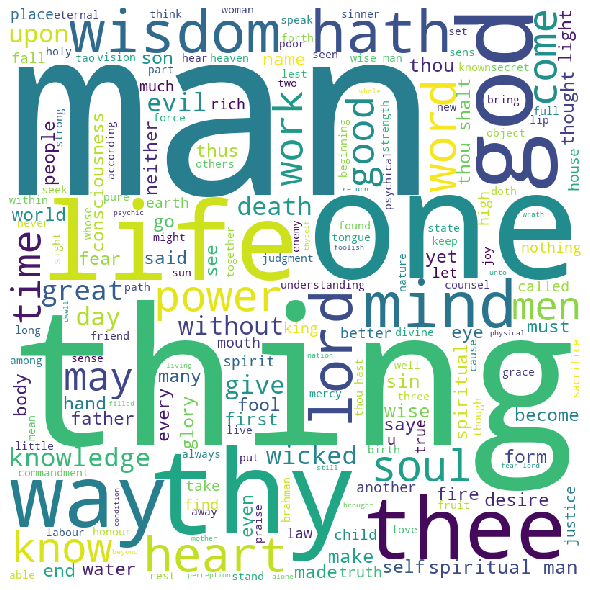

In [14]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(final_string))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### K-Means

In [21]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(final_string)

In [23]:
distortions=[]
for k in range(1,11):
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)
    distortions.append(model.inertia_)
    
distortions

[569.5085509657126,
 551.3368069597411,
 546.2651179520553,
 543.3035866057777,
 539.6224229771233,
 538.7014897829494,
 534.1358858881393,
 530.1862164778978,
 530.4232749268664,
 526.4464714000692]

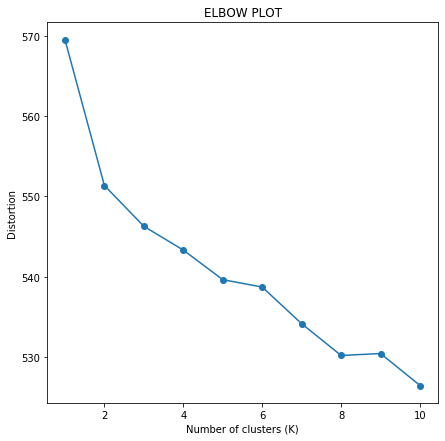

In [24]:
plt.figure(figsize = (7,7))
plt.plot(range(1,11),distortions,marker='o')
plt.title('ELBOW PLOT')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.show()

In [19]:
true_k = k
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 worship
 people
 brahman
 know
 mind
 able
 darkness
 think
 sage
 ear
Cluster 1:
 know
 tao
 thing
 desire
 life
 heaven
 knowledge
 world
 men
 brahman
Cluster 2:
 shall
 man
 hath
 god
 thy
 lord
 fool
 wicked
 thing
 wisdom
Cluster 3:
 thy
 thou
 thee
 shall
 man
 shalt
 god
 hath
 thing
 lord
Cluster 4:
 self
 atman
 sens
 mind
 intellect
 body
 know
 seated
 object
 dwells
Cluster 5:
 spiritual
 power
 man
 consciousness
 life
 psychical
 psychic
 mind
 come
 self
Cluster 6:
 said
 nachiketas
 brahman
 boon
 thee
 yama
 vayu
 death
 devas
 replied
Cluster 7:
 right
 feeling
 fabrication
 stress
 cessation
 monk
 called
 perception
 noble
 mental


## Conclusion


Some words like man, wisdom were common to all the religious texts.

Texts that have similar words can have the same title and can belong  particular religious book

Frequently occurring words can be grouped together irrespective of titles

Some more cleaning of the text files can be done with better results.

Mismatches between the labels and contents can be reduced.

DeD algorithm retrieved the optimal number of clusters as 8